In [1]:
%pylab inline
#plt.style.use('dark_background')
import tqdm
from scipy.special import ellipk,ellipe
import warnings
from scipy import sqrt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# helper functions defining implicit equations for 
# the topological and trivial part of the spectrum
# ala montambaux

def Ftri(a,e):
    return sqrt(e)*(  2*a*ellipe((a+e)/(2*e))
                   +(e-a)*ellipk((a+e)/(2*e))
                   )
def Ftop(a,e):
    return sqrt(a+e)*(    a*ellipe((2*e)/(a+e))
                     +(e-a)*ellipk((2*e)/(a+e))
                     )

In [3]:
# solving the exact eigenvalue problem 
# for magnetic field in plane 
dim=1000 # discretization dimension
B=1/20   # magnetic field strength 
kran=linspace(-1.5,1.5,500) # discretization in p_x
z=linspace(-16,16,dim)      # discretization in z
dz=(max(z)-min(z))/dim
# momentum operator in the z direction
pz2=(2*diag(ones(dim))-diag(ones(dim-1),1)-diag(ones(dim-1),-1))/dz**2
# helper function to generate dimensionless eigen problem
makeham=(lambda a:diag((a-z**2)**2-2*z)+pz2)
# solve for spectrum as a function of p_x
datP=[]
for k in tqdm.tqdm_notebook(kran):
    datP.append(B**(2/3)*sqrt(eigvalsh(makeham( (1-k**2)/B**(2/3) ))))
datP=array(datP)

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

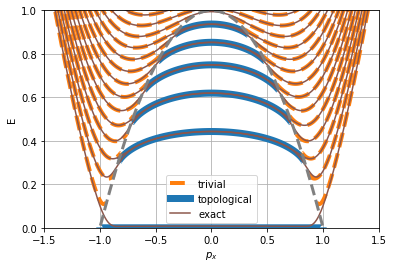

In [4]:
# these are here onyl to generate legend
plot(kran,kran*0+2,'C1--',lw=4,label='trivial')
plot(kran,kran*0+2,'C0',lw=7,label='topological')
plot(kran,kran*0+2,'C5-',label='exact')
# exact spectrum
plot(kran,datP,'C5-')
# solving for the implicitly defined semiclassical spectrum
eran=linspace(0,1.5,3000)
k,e=meshgrid(kran,eran)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # semiclassical aproximations to trivial
    # and topological part of the spectrum
    CStop=contour(k,e,Ftop((1-k**2)/B**(2/3),e/B**(2/3)),
        levels=[3*pi/2*n for n in range(50)],
       colors='C0',linewidths=7)
    CStriv=contour(k,e,Ftri((1-k**2)/B**(2/3),e/B**(2/3)),
        levels=[3*pi/(2*sqrt(2))*(n+1/2) for n in range(50)],
       colors='C1',linestyles='dashed',linewidths=4)
# boundary of topological and non toplogical regions
bndr=(1-kran**2) 
plot(kran[bndr>0],bndr[bndr>0],'--',color='grey',lw=3)


# making picture pretty 
ylim(0,1)
grid()
legend()
xlabel(r'$p_x$')
ylabel('E');